In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

In [50]:
# Numbers of space and time steps
Nt = 250
Nx = 200

# Space and time step size
dt = 0.1
dx = 0.1

# Convection Coefficient
convection = -0.1

# Setting up the initial condition
x = np.arange(-5, 5, dx)

#init = 2*(1/np.sqrt(0.01*2*np.pi))*np.exp(-(1/2)*((x**2)/2))
init = 3*np.sin(x)

In [51]:
# Solving the diffusion equation
def solve(Nt, Nx, dt, dx, convection, init):
    transport = dc.convection_1dims(Nt, Nx, dt, dx, convection, init)
    model = transport.solve()

    return model.solution


In [52]:
density = solve(Nt, Nx, dt, dx, convection, init)

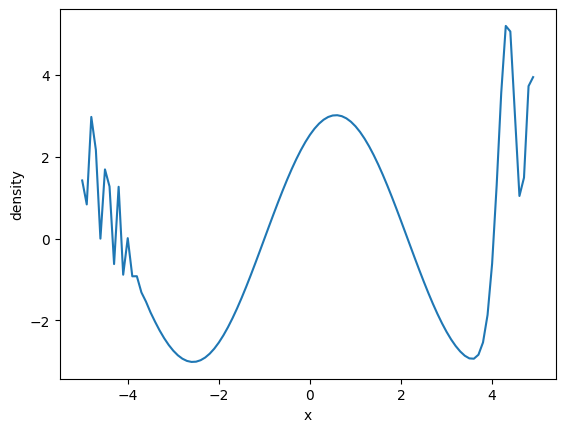

In [53]:
# Plotting the 100th time step state
plt.figure(0)
plt.plot(x, density[100])
plt.xlabel('x')
plt.ylabel('density')
plt.show()


In [56]:
# Animates the convection model in 1 dimension
def animation_(solution, X, fps, frn, filename):
        fig = plt.figure()
        ax = plt.axes(xlim=(-5, 5), ylim=(-4, 4)) # left bound -5 and right bound 5
        line, = ax.plot(X, solution[0])
        plt.xlabel('x')
        plt.ylabel('density')

        # animation function.  This is called sequentially
        def animate(i):
            y = solution[i, :]
            global X
            line.set_ydata(y)
            return line,

        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(fig, animate, frames=frn, interval=20, blit=True)
        plt.show()
        anim.save(filename, writer='pillow', fps=fps)


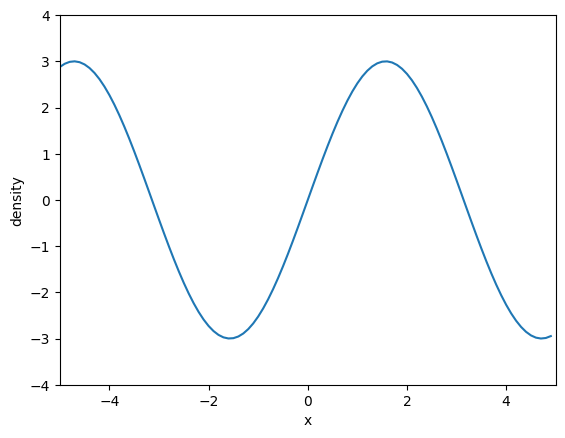

In [57]:
# Setting up the animation
FPS = 60
FRN = 250
FILE = './example-img/convection_in_1_dimension.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animation_(density, x, FPS, FRN, FILE)